# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
import json
from pprint import pprint
import requests
from api_keys import api_key
from citipy import citipy

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [50]:
# List to hold new data
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [52]:
# New lists for data
city_id = []
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_spd = []
country = []
date_time = []

# loop through the list of cities and make API calls 

# Counter for API calls
counter_city = 1
counter_set = 1

print("Beginning Data Retrieval")
print("-----------------------------")

#loop through each city
for city in cities:
    query = query_url + city
    response = requests.get(query)
    city_data = response.json()
    print(f"Processing Record {counter_city} of Set {counter_set} | {city}")
    #     try to grab the city info and city weather
    try:
        city_id_response = city_data['id']
        city_name_response = city_data['name']
        latitude_response = city_data['coord']['lat']
        longitude_response = city_data['coord']['lon']
        temp_response = city_data['main']['temp_max']
        humidity_response = city_data['main']['humidity']
        cloudiness_response = city_data['clouds']['all']
        wind_spd_response = city_data['wind']['speed']
        country_response = city_data['sys']['country']
        date_response = city_data['dt']
        city_id.append(city_id_response)
        city_name.append(city_name_response)        
        latitude.append(latitude_response)
        longitude.append(longitude_response)
        max_temp.append(temp_response)
        humidity.append(humidity_response)
        cloudiness.append(cloudiness_response)
        wind_spd.append(wind_spd_response)
        country.append(country_response)
        date_time.append(date_response)

    
    except KeyError:
        print("City not found. Skipping...")
    
    if counter_city < 49:
        counter_city +=1
    else: 
        counter_city = 1
        counter_set +=1
        
len(city_id)


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | coro
Processing Record 4 of Set 1 | xapuri
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | pajan
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | asau
Processing Record 10 of Set 1 | montepuez
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | lata
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | yunyang
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | broome
Processing Record 20 of Set 1 | tabas
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | thabazimbi
Processing Record 23 of Set 1 | jalu
Process

Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | chapeco
Processing Record 45 of Set 4 | athabasca
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | sept-iles
Processing Record 1 of Set 5 | nantucket
Processing Record 2 of Set 5 | whitehorse
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | tripoli
Processing Record 5 of Set 5 | imeni poliny osipenko
Processing Record 6 of Set 5 | podgornoye
Processing Record 7 of Set 5 | hihifo
City not found. Skipping...
Processing Record 8 of Set 5 | nemuro
Processing Record 9 of Set 5 | poum
Processing Record 10 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 5 | babanusah
City not found. Skipping...
Processing Record 12 of Set 5 | ondorhaan
City not found. Skipping...
Processing Record 13 of Set 5 | lac-megantic
Processing Record 14 of Set 5 | nome
Processing

Processing Record 32 of Set 8 | sabzevar
Processing Record 33 of Set 8 | pedra
Processing Record 34 of Set 8 | conceicao da barra
Processing Record 35 of Set 8 | okhotsk
Processing Record 36 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 8 | santa cruz de la palma
Processing Record 38 of Set 8 | shemursha
Processing Record 39 of Set 8 | bonavista
Processing Record 40 of Set 8 | russell
Processing Record 41 of Set 8 | yialos
City not found. Skipping...
Processing Record 42 of Set 8 | balimo
City not found. Skipping...
Processing Record 43 of Set 8 | belyy yar
Processing Record 44 of Set 8 | menongue
Processing Record 45 of Set 8 | el limon
Processing Record 46 of Set 8 | namangan
Processing Record 47 of Set 8 | ariquemes
Processing Record 48 of Set 8 | khonuu
City not found. Skipping...
Processing Record 49 of Set 8 | alta floresta
Processing Record 1 of Set 9 | dunedin
Processing Record 2 of Set 9 | brokopondo
Processing Record 3 of Set 9 | luderitz
Processing Record 

Processing Record 22 of Set 12 | aksarka
Processing Record 23 of Set 12 | mackay
Processing Record 24 of Set 12 | katubao
Processing Record 25 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 26 of Set 12 | vilhena
Processing Record 27 of Set 12 | yenagoa
Processing Record 28 of Set 12 | chistogorskiy
Processing Record 29 of Set 12 | nuevo progreso
Processing Record 30 of Set 12 | yeppoon
Processing Record 31 of Set 12 | wonthaggi
Processing Record 32 of Set 12 | lazarev
Processing Record 33 of Set 12 | bulaevo
Processing Record 34 of Set 12 | ada
Processing Record 35 of Set 12 | lodwar
Processing Record 36 of Set 12 | safwah
City not found. Skipping...
Processing Record 37 of Set 12 | conceicao do araguaia
Processing Record 38 of Set 12 | orlik
Processing Record 39 of Set 12 | terney
Processing Record 40 of Set 12 | copiapo
Processing Record 41 of Set 12 | angoram
Processing Record 42 of Set 12 | vestmanna
Processing Record 43 of Set 12 | ljungby
Processing Record 4

562

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
# Create the data frame
city_df = pd.DataFrame({
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date_time,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_spd,
})


city_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [75]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,21,PF,1590384545,72,-23.12,-134.97,72.09,25.26
1,Tuktoyaktuk,20,CA,1590384545,74,69.45,-133.04,37.40,14.99
2,Coro,70,VE,1590384545,81,11.40,-69.67,77.92,15.05
3,Xapuri,43,BR,1590384545,75,-10.65,-68.50,60.30,2.42
4,Busselton,95,AU,1590384292,83,-33.65,115.33,53.01,29.46


In [76]:
# Export to csv
city_df.to_csv("output/CityWeather.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

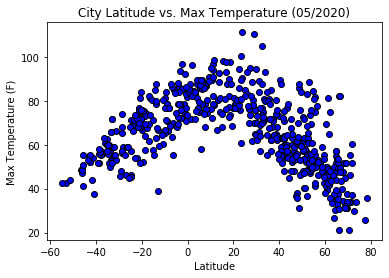

In [77]:
plt.scatter(latitude, max_temp, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("output/CityLatVsTemp.png")
plt.show()


In [78]:
# Scatter plot employed to illustrate the relationship between latitude location and the occurance of 
# high temperatures for a day in the month of May. The plot indicates that max temperatures are likely to increase
# as the latitude of a given city draws nearer to the equator. 

#### Latitude vs. Humidity Plot

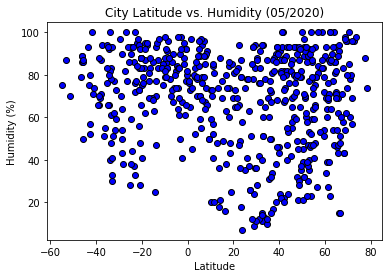

In [79]:
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output/CityLatVsHumidity.png")
plt.show()


In [80]:
# Scatter plot employed to illustrate the relationship between latitude location and the percentage of humidity
# for a day in the month of May. For this day in May, there is some indication that the lowest occurances of 
# humidity are present in the cities within 40° north of the Equator. 

#### Latitude vs. Cloudiness Plot

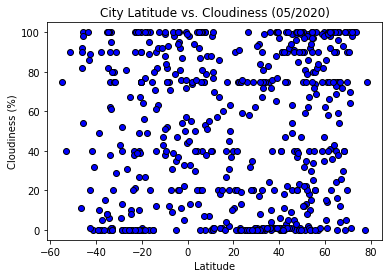

In [81]:
plt.scatter(latitude, cloudiness, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output/CityLatVsCloud.png")
plt.show()


In [82]:
# Scatter plot employed to illustrate the relationship between latitude location and the cloudiness
# for a day in the month of May. For this day in May, there does not appear to be a clear influence on the 
# latitude location of the city data set and severity of cloud cover. 

#### Latitude vs. Wind Speed Plot

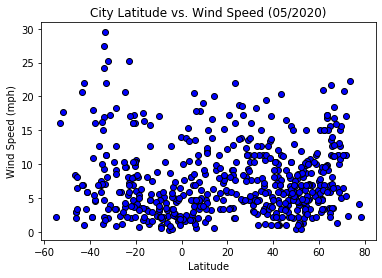

In [83]:
plt.scatter(latitude, wind_spd, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output/CityLatVsWind.png")
plt.show()


In [84]:
# Scatter plot employed to illustrate the relationship between latitude location and the current wind speed
# for a day in the month of May. For this day in May, while there does appear to be higher winds for a small
# selection of cities between -30° and -40°, it does not appear to be a significant number. 

## Linear Regression

In [85]:
# Create Northern and Southern Hemisphere DataFrames

north_df = city_df.loc[(city_df["Lat"] >= 0)] 
south_df = city_df.loc[(city_df["Lat"] < 0)] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

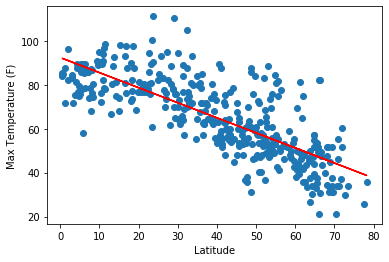

The r-squared value is -0.7697012120150095


In [86]:
# Add the linear regression equation and line to plot 
x_values = north_df['Lat']
y_values = north_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

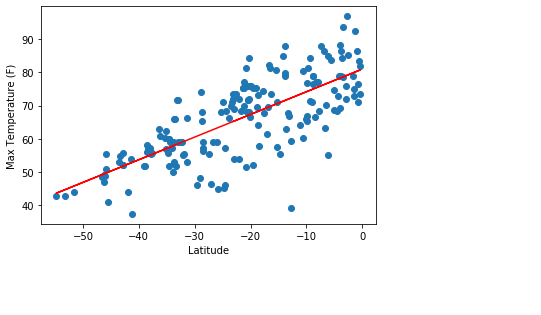

The r-squared value is 0.7405148228587642


In [87]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

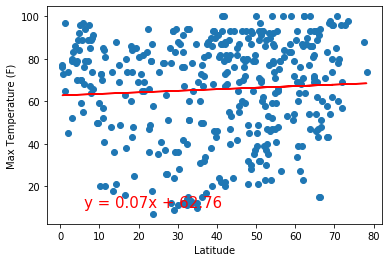

The r-squared value is 0.06055650479624936


In [88]:
x_values = north_df['Lat']
y_values = north_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

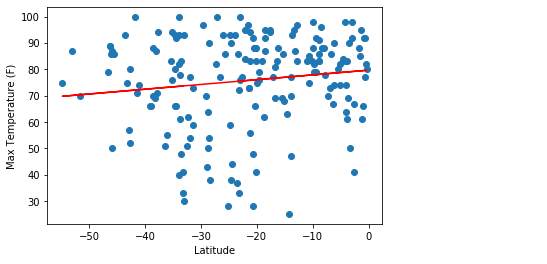

The r-squared value is 0.13941141401374743


In [89]:
x_values = south_df['Lat']
y_values = south_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

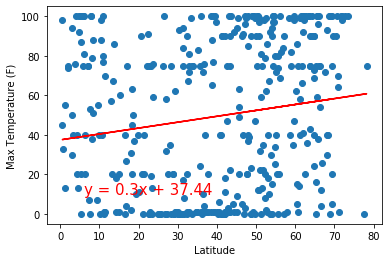

The r-squared value is 0.15705931785412056


In [90]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

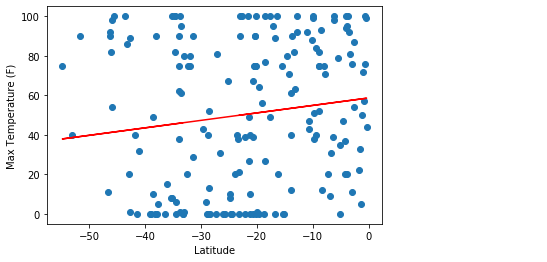

The r-squared value is 0.13830135208073413


In [91]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

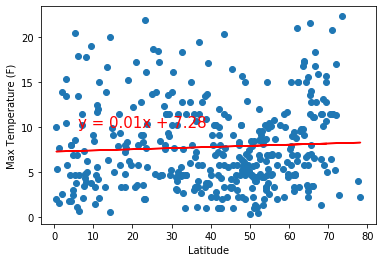

The r-squared value is 0.054164854047806126


In [92]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

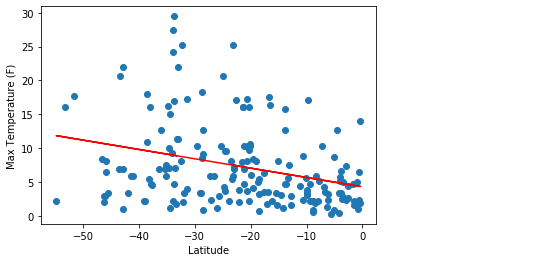

The r-squared value is -0.3079741869840553


In [93]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')